In [11]:
#Import libraries to prep the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import ML libraries
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

#Import libraries to evaluate the models
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#Load the dataset
df = pd.read_csv('flights.csv')

df


,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.20,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.30,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.50,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.60,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,279,152.10,1.1,198.0,22.857437,0.095421,-79.782802,40.459018,271.560190,0.021382,...,0.009449,0.444553,-0.274965,-9.796700,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257892,279,152.20,1.1,196.0,22.847422,0.095421,-79.782802,40.459018,271.571983,0.021383,...,-0.001755,0.451230,-0.240619,-9.793810,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257893,279,152.41,1.2,189.0,22.856186,0.111325,-79.782802,40.459018,271.584533,0.021385,...,0.008545,0.443839,-0.274903,-9.796004,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257894,279,152.60,1.1,187.0,22.854933,0.127228,-79.782802,40.459018,271.588050,0.021393,...,-0.001379,0.443880,-0.248434,-9.794703,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7


In [12]:
#Set the data frame to just data from flight 1 to reduce computing time
df = df.loc[(df['flight'] == 1)]
df

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.20,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.30,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.50,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.60,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1,200.12,0.5,106.0,23.061522,0.135180,-79.782348,40.458035,268.296291,-0.000503,...,-0.001796,0.232549,0.733589,-9.772775,4.0,0.0,25,2019-04-07,10:13,R5
1335,1,200.30,0.5,104.0,23.070286,0.135180,-79.782348,40.458034,268.307138,-0.000486,...,-0.004984,0.230562,0.743619,-9.772132,4.0,0.0,25,2019-04-07,10:13,R5
1336,1,200.40,0.5,99.0,23.067781,0.143132,-79.782348,40.458034,268.310919,-0.000496,...,-0.005924,0.234810,0.736684,-9.774733,4.0,0.0,25,2019-04-07,10:13,R5
1337,1,200.60,0.5,103.0,23.059017,0.119277,-79.782348,40.458034,268.324848,-0.000478,...,0.000394,0.232103,0.732756,-9.772891,4.0,0.0,25,2019-04-07,10:13,R5


## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
x = df[['velocity_y', 'linear_acceleration_y']]
ws = df['wind_speed']

In [38]:
lr_model = LinearRegression()
x_train, x_test, ws_train, ws_test = train_test_split(x, ws, test_size =0.33)

lr_model.fit(x_train, ws_train)

LinearRegression()

In [15]:
lr_predictions = lr_model.predict(x_test)
lr_residuals = lr_predictions - ws_test

(array([12., 12., 41., 61., 89., 74., 33., 51., 52., 17.]),
 array([-2.66303307, -2.17246783, -1.68190258, -1.19133733, -0.70077209,
        -0.21020684,  0.2803584 ,  0.77092365,  1.26148889,  1.75205414,
         2.24261938]),
 <BarContainer object of 10 artists>)

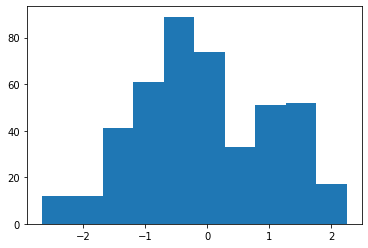

In [40]:
plt.hist(lr_residuals)

In [17]:
print("R-squared:", lr_model.score(x_test, ws_test))
print("MSE:", mean_squared_error(ws_test, lr_predictions)**0.05)

R-squared: 0.7078380751568771
MSE: 1.0061150842105104


## Random Forest Regressor

In [30]:
rfr_model=RandomForestRegressor(random_state=42)
rfr_model.fit(x_train, ws_train)

RandomForestRegressor(random_state=42)

In [31]:
rfr_predictions = rfr_model.predict(x_test)
rfr_residuals = rfr_predictions - ws_test

(array([  1.,   6.,  10.,  21., 118., 195.,  64.,  13.,  10.,   4.]),
 array([-2.74400018, -2.22210016, -1.70020015, -1.17830014, -0.65640013,
        -0.13450012,  0.38739989,  0.9092999 ,  1.43119991,  1.95309992,
         2.47499993]),
 <BarContainer object of 10 artists>)

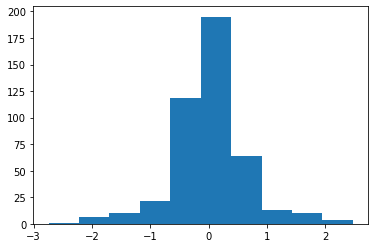

In [32]:
plt.hist(rfr_residuals)

In [39]:
print("R-squared:", rfr_model.score(x_test, ws_test))
print("MSE:", mean_squared_error(ws_test, rfr_predictions)**0.05)

R-squared: 0.9556123735845343
MSE: 1.1002562337477202


#### Second Random Forest Regression Model to Test Wind Angle vs. Velocity X

In [22]:
rfr_model2=RandomForestRegressor(random_state=42)
rfr_x = df['wind_angle']
rfr_y = df['velocity_x']
rfr_x_train, rfr_x_test, rfr_y_train, rfr_y_test = train_test_split(rfr_x, rfr_y, test_size=0.33)

In [45]:
rfr_model2.fit(np.array(rfr_x_train).reshape(-1,1), rfr_y_train)

RandomForestRegressor(random_state=42)

In [46]:
rfr_predictions2 = rfr_model2.predict(np.array(rfr_x_test).reshape(-1,1))
rfr_residuals2 = rfr_predictions2 - rfr_y_test

In [48]:
print("R-squared:", rfr_model2.score(np.array(rfr_x_test).reshape(-1,1),  rfr_y_test))
print("MSE:", mean_squared_error(rfr_y_test, rfr_predictions2)**0.05)

R-squared: -0.09279612580445118
MSE: 0.9916013980784212


## Support Vector Machine

In [23]:
svm_x = df['wind_angle']
svm_y = df['velocity_y']
svm_x_train, svm_x_test, svm_y_train, svm_y_test = train_test_split(svm_x, svm_y, test_size=0.33)

In [24]:
svm_model = SVR(kernel='linear')
svm_model.fit(np.array(svm_x_train).reshape(-1,1), svm_y_train.astype('int'))

SVR(kernel='linear')

In [26]:
svm_predictions = svm_model.predict(np.array(svm_x_test).reshape(-1,1))

In [28]:
print("R-squared:", svm_model.score(np.array(svm_x_test).reshape(-1,1), svm_y_test))
print("MSE:", mean_squared_error(svm_y_test, svm_predictions)**0.05)

R-squared: 0.06540494598611224
MSE: 1.0634339761449398


#### SVM Using multiple labels to improve accuracy

In [52]:
svr_x = df.drop(['velocity_y', 'date', 'altitude', 'time_day', 'route', 'flight', 'time', 'altitude'], axis=1)
svr_y = df['velocity_y']
svr_x_train, svr_x_test, svr_y_train, svr_y_test = train_test_split(svr_x, svr_y, test_size=0.33)

In [53]:
svr_model = SVR(kernel='linear')
svr_model.fit(svr_x_train, svr_y_train.astype('int'))

SVR(kernel='linear')

In [54]:
svr_predictions = svr_model.predict(svr_x_test)

In [55]:
print("R-squared:", svr_model.score(svr_x_test, svr_y_test))
print("MSE:", mean_squared_error(svr_y_test, svr_predictions)**0.05)

R-squared: 0.8040322506232725
MSE: 0.9818899662401561
